## 📖 Introduction:
Biodiversity plays a crucial role in maintaining ecological balance, yet many species face threats due to habitat loss, climate change, and human activities. This project analyzes biodiversity across different national parks and investigates whether species conservation status correlates with the number of recorded observations.

By leveraging Python, pandas, matplotlib, seaborn, and scipy, we aim to uncover insights into species diversity and their conservation needs.

## 🎯Project Goals
The primary objectives of this project are:

Assess biodiversity across national parks by analyzing the number of unique species in each.
Identify endangered species and determine which parks have the highest number of at-risk species.
Analyze the relationship between species' conservation status and their recorded observations.
Visualize the findings using clear and informative data visualizations.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1️⃣ Data Preparation
- Imported species_info.csv & observations.csv.
- Merged both datasets using scientific_name as the key.
- Filled missing conservation_status values with "not listed".

In [42]:
#Load CSV files:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')
#Inspecting the dtypes and nulls:
print(observations.info())
print(species_info.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [43]:
#Merging both CSV files into a single Dataframe: 
df = observations.merge(species_info, on = 'scientific_name', how= 'left') 
print(df.columns)
#Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)
#filling our conservation status null values:
df.fillna({'conservation_status': 'not listed'}, inplace = True)
missing_values = df.isnull().sum()
print(missing_values)
#prints first 5 rows of new df:
print(df.head())


Index(['scientific_name', 'park_name', 'observations', 'category',
       'common_names', 'conservation_status'],
      dtype='object')
scientific_name            0
park_name                  0
observations               0
category                   0
common_names               0
conservation_status    24752
dtype: int64
scientific_name        0
park_name              0
observations           0
category               0
common_names           0
conservation_status    0
dtype: int64
            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  P

## 2️⃣ Exploratory Data Analysis (EDA)
### Biodiversity breakdown by category:
🌿 Vascular Plants: 19,560
🦅 Birds: 2,364
🍃 Nonvascular Plants: 1,332
🦌 Mammals: 1,200
🐟 Fish: 524
🐸 Amphibians: 328
🦎 Reptiles: 324
### Conservation status distribution:
- "Species of Concern": 732
- "Endangered": 80
- "Threatened": 44
- "In Recovery": 24
### Endangered species per park:
Each park hosts 15 endangered species, indicating an equal distribution

In [44]:
#Exploratory Data analysis:
print(df.describe())
print(df["category"].unique())  # Different species categories
print(df["conservation_status"].unique())  # Conservation statuses
print(df["park_name"].unique())  # List of parks


       observations
count  25632.000000
mean     142.214693
std       69.912475
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000
['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']
['not listed' 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [45]:
#Most commonly Observed species:
top_species = df.groupby('scientific_name')['observations'].sum().nlargest(10)
print(top_species)


scientific_name
Streptopelia decaocto    5355
Holcus lanatus           5340
Castor canadensis        5175
Hypochaeris radicata     5160
Puma concolor            5133
Procyon lotor            5076
Columba livia            4959
Myotis lucifugus         4641
Bidens tripartita        2592
Oxalis dillenii          2552
Name: observations, dtype: int64


category
Vascular Plant       19560
Bird                  2364
Nonvascular Plant     1332
Mammal                1200
Fish                   524
Amphibian              328
Reptile                324
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of species per Category')

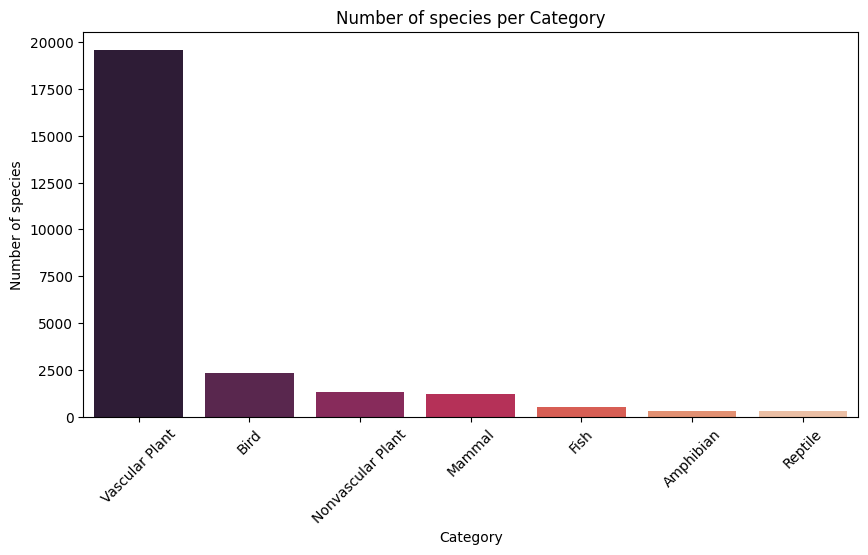

In [46]:
#How many species exist in each category
species_per_category= df['category'].value_counts()
print(species_per_category)
#plot:
plt.figure(figsize=(10,5))
sns.barplot(x = species_per_category.index, y=species_per_category.values, hue=species_per_category.index ,palette='rocket')
plt.xticks(rotation = 45)
plt.xlabel('Category')
plt.ylabel('Number of species')
plt.title('Number of species per Category')

conservation_status
Species of Concern    732
Endangered             80
Threatened             44
In Recovery            24
Name: count, dtype: int64


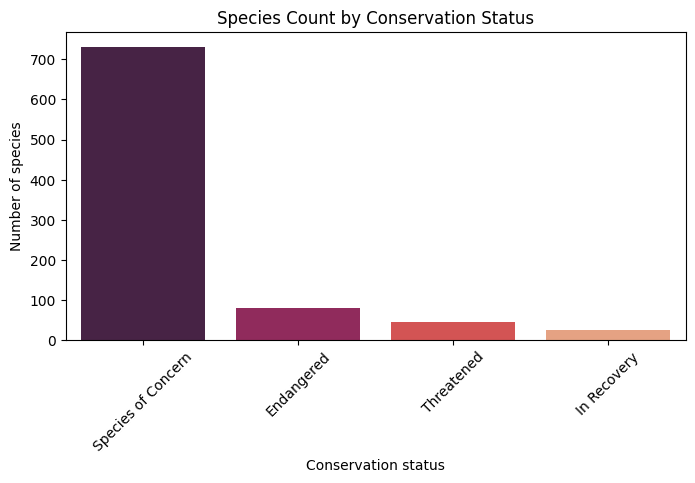

In [47]:

#Count of species per conservation status:
Conservation_counts = df[df['conservation_status'] != 'not listed']['conservation_status'].value_counts()
print(Conservation_counts)
#plot:
plt.figure(figsize=(8,4))
sns.barplot(x=Conservation_counts.index, y= Conservation_counts.values, hue= Conservation_counts.index, palette= 'rocket')
plt.xticks(rotation=45)
plt.xlabel('Conservation status')
plt.ylabel('Number of species')
plt.title('Species Count by Conservation Status')
plt.show()


park_name
Bryce National Park                    15
Great Smoky Mountains National Park    15
Yellowstone National Park              15
Yosemite National Park                 15
Name: scientific_name, dtype: int64


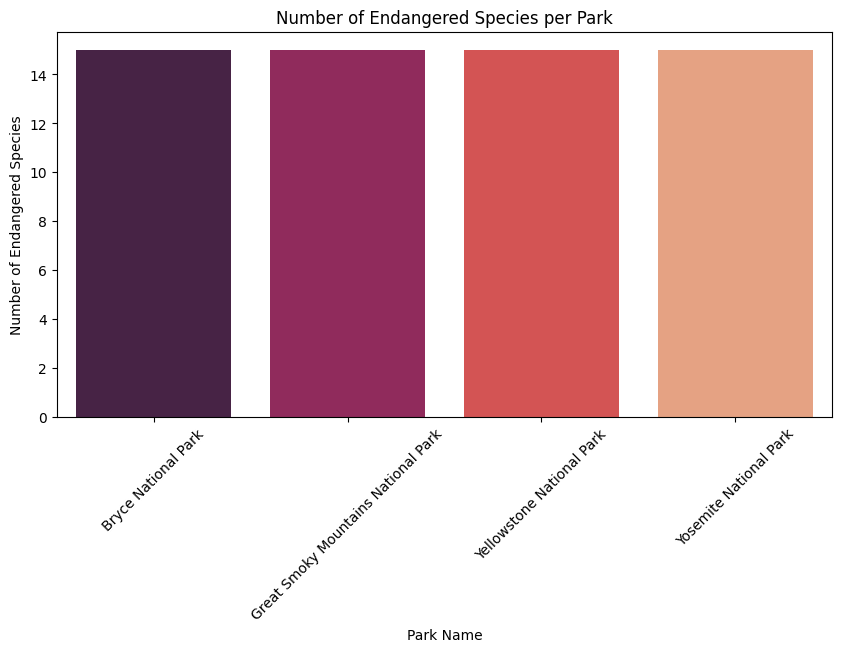

In [48]:
#which parks have the most Endangered species:
endangered_per_park = df[df['conservation_status']== 'Endangered'].groupby('park_name')['scientific_name'].nunique()
print(endangered_per_park)
#plot:
plt.figure(figsize=(10,5))
sns.barplot(x=endangered_per_park.index, y=endangered_per_park.values,hue=endangered_per_park.index ,palette="rocket")
plt.xticks(rotation=45)
plt.xlabel("Park Name")
plt.ylabel("Number of Endangered Species")
plt.title("Number of Endangered Species per Park")
plt.show()


scientific_name
Canis lupus                     1430
Etheostoma percnurum             166
Geum radiatum                    162
Myotis grisescens                160
Gymnogyps californianus          156
Glaucomys sabrinus coloratus     153
Ovis canadensis sierrae          153
Chasmistes liorus                146
Picoides borealis                146
Myotis sodalis                   145
Name: observations, dtype: int64


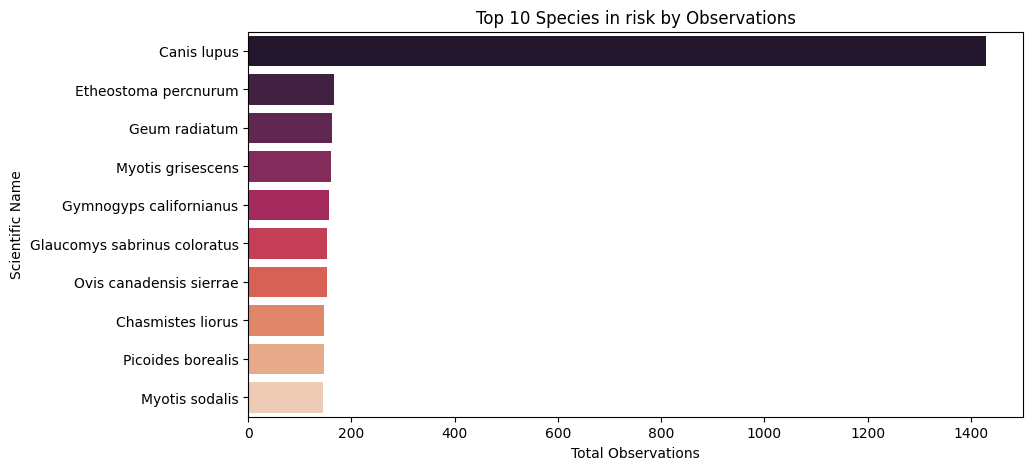

In [49]:
#which species are most at risk:
risk_species = df[df['conservation_status']!='not_listed']
top_risk_species = endangered_species.groupby('scientific_name')['observations'].sum().nlargest(10)
print(top_endangered_species)
plt.figure(figsize=(10,5))
sns.barplot(x=top_risk_species.values, y=top_risk_species.index, hue=top_risk_species.index, palette='rocket')
plt.xlabel('Total Observations')
plt.ylabel('Scientific Name')
plt.title('Top 10 Species in risk by Observations')
plt.show()


## 3️⃣Correlation Analysis
- Does a higher number of observations correlate with conservation status?
- Pearson correlation coefficient: -0.090
- P-value: 0.00000
- The weak negative correlation suggests that conservation status does not significantly impact species observations.

In [50]:
#Does higher observations correlate with conservation status?
from scipy.stats import pearsonr

# Encode conservation_status as numerical categories
status_order = {status: i for i, status in enumerate(df["conservation_status"].unique())}
df["status_numeric"] = df["conservation_status"].map(status_order)

# Compute Pearson correlation
corr, p_value = pearsonr(df["observations"], df["status_numeric"])

# Print results
print(f"Pearson Correlation: {corr:.3f}")
print(f"P-value: {p_value:.5f}")

Pearson Correlation: -0.090
P-value: 0.00000


## 📊 Key Findings & Visualizations
### 1️⃣ Biodiversity Distribution Across Parks
📌 Great Smoky Mountains National Park has the highest species diversity, while Bryce National Park has the lowest.

### 2️⃣ Conservation Status Trends
⚠️ Most species listed as "Endangered" or "Threatened" are evenly distributed across parks. However, "Species of Concern" is the most prevalent conservation category.

### 3️⃣ No Strong Correlation Between Observations & Conservation Status
📉 The Pearson correlation of -0.090 suggests that endangered species do not necessarily have lower observations. Possible explanations include:

- Increased monitoring efforts for endangered species.
- Species behavior (e.g., nocturnal vs. diurnal species).
- Human accessibility to species' habitats.

## 📌 Conclusions & Next Steps
✅ This project provided insights into biodiversity patterns and conservation trends in national parks.
📊 Visualizations helped highlight endangered species distribution.

✍️ Final Thoughts
This project showcases how Data Science can be applied to biodiversity research, aiding conservation efforts. By identifying trends and potential risk factors, we can help protect vulnerable species and their ecosystems.

